In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import sknn.ae as sa
from sklearn import metrics

from keras.layers import Input, Dense
from keras.models import Model
from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.utils import to_categorical

In [108]:
X_train = pd.read_csv("MNIST_data/bindigit_trn.csv",header=None).as_matrix()
y_train = pd.read_csv("MNIST_data/targetdigit_trn.csv",header=None,names=["Label"]).as_matrix()

X_test = pd.read_csv("MNIST_data/bindigit_tst.csv",header=None).as_matrix()
y_test = pd.read_csv("MNIST_data/targetdigit_tst.csv",header=None,names=["Label"]).as_matrix()

In [141]:
def plotWeights(weights):
    n = weights.shape[0]  # how many digits we will display
    plt.figure(figsize=(20, 20))
    for i in range(n):
        # display weights
        ax = plt.subplot(10, 10, i + 1)
        plt.imshow(weights[i].reshape(10, 10))
        #plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [110]:
#autoencoder = sa.AutoEncoder(layers)

In [111]:
'''
input_img = Input(shape=(784,))
encoded = Dense(150, activation='relu')(input_img) #1st hidden layer
encoded = Dense(50, activation='relu')(encoded) #2nd hidden layer

decoded = Dense(150, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img,encoded)

autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')
'''

"\ninput_img = Input(shape=(784,))\nencoded = Dense(150, activation='relu')(input_img) #1st hidden layer\nencoded = Dense(50, activation='relu')(encoded) #2nd hidden layer\n\ndecoded = Dense(150, activation='relu')(encoded)\ndecoded = Dense(784, activation='sigmoid')(encoded)\n\nautoencoder = Model(input_img,encoded)\n\nautoencoder.compile(optimizer='adadelta', loss='mean_squared_error')\n"

In [112]:
'''
autoencoder.fit(X_train,X_train,
               epochs=20,
               batch_size=64,
               shuffle=True,
               verbose=0,
                validation_data=(X_test, X_test))
                '''

'\nautoencoder.fit(X_train,X_train,\n               epochs=20,\n               batch_size=64,\n               shuffle=True,\n               verbose=0,\n                validation_data=(X_test, X_test))\n                '

In [113]:
'''
encoder = Model(input_img,encoded)
pred = encoder.predict(X_train)
'''

'\nencoder = Model(input_img,encoded)\npred = encoder.predict(X_train)\n'

In [114]:
'''
logistic = LogisticRegression(C=100,verbose=True)
logistic.fit(pred,y_train)
'''

'\nlogistic = LogisticRegression(C=100,verbose=True)\nlogistic.fit(pred,y_train)\n'

In [115]:
'''
pred_encoded = encoder.predict(X_test)
predicted = logistic.predict(pred_encoded)
'''

'\npred_encoded = encoder.predict(X_test)\npredicted = logistic.predict(pred_encoded)\n'

In [116]:
'''
print("Logistic regression using Autoencoder features:\n%s\n" %
      metrics.classification_report(y_test,predicted))

print("Accuracy:",metrics.accuracy_score(y_test,predicted))
print("\n")
'''

'\nprint("Logistic regression using Autoencoder features:\n%s\n" %\n      metrics.classification_report(y_test,predicted))\n\nprint("Accuracy:",metrics.accuracy_score(y_test,predicted))\nprint("\n")\n'

## Alternative version with perceptron classification

In [117]:
input_img = Input(shape=(784,))
encoded1 = Dense(150, activation='relu')(input_img) #1st hidden layer
encoded2 = Dense(100, activation='relu')(encoded1) #2nd hidden layer
encoded3 = Dense(50, activation='relu')(encoded2) #3d hidden layer
decoded1 = Dense(100, activation='relu')(encoded3)
decoded2 = Dense(150, activation='relu')(decoded1)
decoded3 = Dense(784, activation='sigmoid')(decoded2)

autoencoder = Model(input_img,decoded3)

autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [118]:
autoencoder.fit(X_train,X_train,
               epochs=20,
               batch_size=64,
               shuffle=True,
               verbose=0,
                validation_data=(X_test, X_test))

In [119]:
hidden = Dense(50, activation='relu')(encoded2)
out = Dense(10, activation='sigmoid')(hidden)
classifier = Model(input_img,out)
classifier.compile(optimizer='adadelta', loss='mean_squared_error')

In [120]:
y_train = to_categorical(y_train, num_classes=10)
classifier.fit(X_train,y_train,
               epochs=50,
               batch_size=64,
               shuffle=True,
               verbose=0)

In [121]:
predictions = classifier.predict(X_test)
pred = np.argmax(predictions,axis=1)

In [122]:
print("Classification using NN:\n%s\n" %
      metrics.classification_report(y_test,pred))

print("Accuracy:",metrics.accuracy_score(y_test,pred))
print("\n")

Classification using NN:
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       196
          1       0.96      0.97      0.97       227
          2       0.94      0.92      0.93       206
          3       0.94      0.90      0.92       202
          4       0.93      0.96      0.94       196
          5       0.90      0.88      0.89       182
          6       0.94      0.97      0.95       191
          7       0.95      0.93      0.94       205
          8       0.92      0.93      0.93       194
          9       0.94      0.94      0.94       201

avg / total       0.94      0.94      0.94      2000


Accuracy: 0.9395




In [140]:
weights = autoencoder.get_weights()

In [134]:
weights[4].shape

(100, 50)

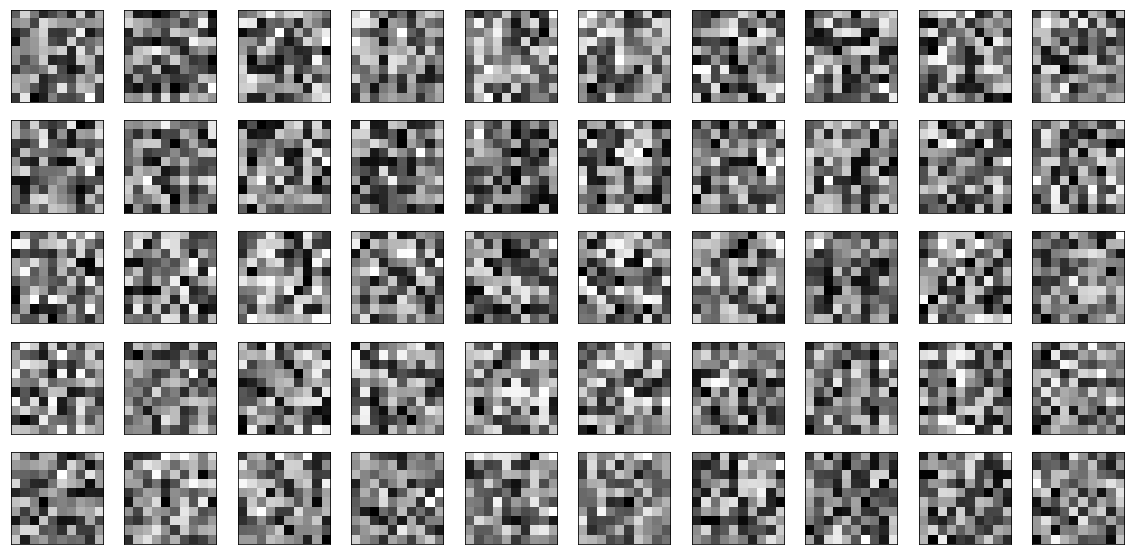

In [142]:
plotWeights(weights[4].T)